# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name:Ramya Madhuri Desineedi

EID: rd32895

Name:Soumya Nayak

EID:sn25829

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a) Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. In the equation above, 1st term is the average prediction from the estimator and the second term is the actual value of function at x0. The difference hence is the "Bias" of the model

b) If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters and complex then it’s going to have high variance and low bias. 


So while fitting a model to our data we need to fit it in such a way that it strikes right balance without overfitting and underfitting the data.
This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time.

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-5,5,101).reshape(-1,1)

lrp = LinearRegression()

In [2]:
def plot_curves(x_train, y_train, x_test, y_test):
    ############################################################ 2nd Order ############################################################
    # Fit polynomial models of degrees 2, 4, 7 to the training data. 
    x_train_2=np.vander(np.squeeze(x_train), 3)
    x_test_2=np.vander(np.squeeze(x_test), 3)
    x_all_2=np.vander(np.squeeze(x_all), 3)
    
    # Print out the mean squared error (on both train and test sets) for all the models. 
    model_2 = lrp.fit(x_train_2, y_train)
    y_train_pred_2 = model_2.predict(x_train_2)
    y_test_pred_2 = model_2.predict(x_test_2)
    y_pred_2 = model_2.predict(x_all_2)
    
    
    ############################################################ 4th Order ############################################################
    # Fit polynomial models of degrees 2, 4, 7 to the training data. 
    x_train_4=np.vander(np.squeeze(x_train), 5)
    x_test_4=np.vander(np.squeeze(x_test), 5)
    x_all_4=np.vander(np.squeeze(x_all), 5)
    
    # Print out the mean squared error (on both train and test sets) for all the models. 
    model_4 = lrp.fit(x_train_4, y_train)
    y_train_pred_4 = model_2.predict(x_train_4)
    y_test_pred_4 = model_2.predict(x_test_4)
    y_pred_4 = model_4.predict(x_all_4)
    
    ############################################################ 7th Order ############################################################
    # Fit polynomial models of degrees 2, 4, 7 to the training data. 
    x_train_7=np.vander(np.squeeze(x_train), 8)
    x_test_7=np.vander(np.squeeze(x_test), 8)
    x_all_7=np.vander(np.squeeze(x_all), 8)
    
    model_7 = lrp.fit(x_train_7, y_train)
    y_train_pred_7 = model_7.predict(x_train_7)
    y_test_pred_7 = model_7.predict(x_test_7)
    y_pred_7 = model_7.predict(x_all_7)
    
    from matplotlib.pyplot import figure
    figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_train, y_train, label = 'train',  color='red') 
    plt.scatter(x_test, y_test, label = 'test',  color='blue')
    
    #2nd Order
    list_2=zip(*sorted(zip(*(x_train,y_train_pred_2))))
    plt.plot(*list_2,label='2nd order with x-train', linewidth=2)
    list_2_all=zip(*sorted(zip(*(x_all,y_pred_2))))
    plt.plot(*list_2_all,label='2nd order with x-all', linewidth=2)
    
    #4th Order
    list_4=zip(*sorted(zip(*(x_train,y_train_pred_4))))
    plt.plot(*list_4,label='4th order with x-train', linewidth=2)
    list_4_all=zip(*sorted(zip(*(x_all,y_pred_4))))
    plt.plot(*list_4_all,label='4th order with x-all', linewidth=2)
    
    #7th Order
    list_7=zip(*sorted(zip(*(x_train,y_train_pred_7))))
    plt.plot(*list_7,label='7th order with x-train', linewidth=2)
    list_7_all=zip(*sorted(zip(*(x_all,y_pred_7))))
    plt.plot(*list_7_all,label='7th order with x-all', linewidth=2)

    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('x vs y with polynomial models of degrees 2, 4 and 7')
    plt.show()

    #MSE
    train_mse_2 = round(mean_squared_error(y_train,y_train_pred_2),3)
    train_mse_4 = round(mean_squared_error(y_train,y_train_pred_4),3)
    train_mse_7 = round(mean_squared_error(y_train,y_train_pred_7),3)

    test_mse_2 = round(mean_squared_error(y_test,y_test_pred_2),3)
    test_mse_4 = round(mean_squared_error(y_test,y_test_pred_4),3)
    test_mse_7 = round(mean_squared_error(y_test,y_test_pred_7),3)
    
    #Writing MSE to an array
    train_mse_list = [train_mse_2, train_mse_4, train_mse_7]
    test_mse_list = [test_mse_2, test_mse_4, test_mse_7]
    print("Train MSE in the order for 2nd, 4th, 7th orders:")
    print(train_mse_list)
    print("Test MSE in the order for 2nd, 4th, 7th orders:")
    print(test_mse_list)

    return train_mse_list, test_mse_list

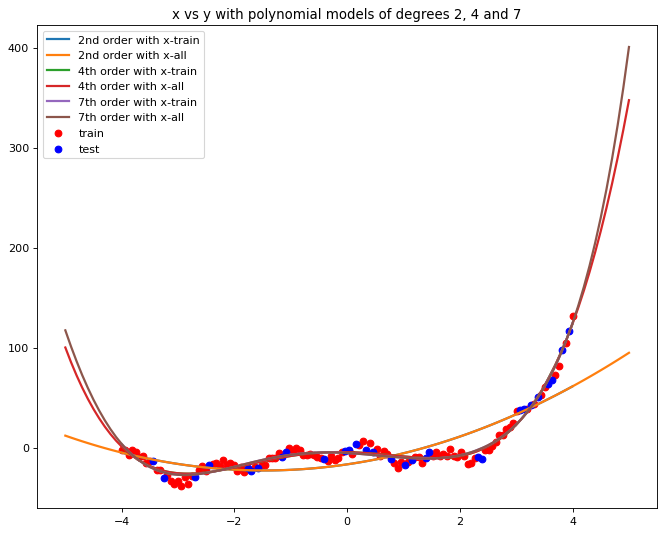

Train MSE in the order for 2nd, 4th, 7th orders:
[247.297, 31.72, 30.677]
Test MSE in the order for 2nd, 4th, 7th orders:
[320.064, 31.292, 33.411]


In [3]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## Answer:

Part (b) - 

4th order polynomial is much better than 2nd order polynomial in terms of fit and marginally better than 7th order polynomial as it almost fits data in a similar way. Also, Test MSE for 4th order polynomial is slightly better than 7th order polynomial. For 7th order polynomial train MSE is lowest, however Test MSE is higher than 4th order polynomial, indicating that 7th order polynomial was chasing noise in the data and overfitting, hence has high variance. However, 4th order polynomial balances both bias and variance which is evident from low Train and Test MSE.


20% data


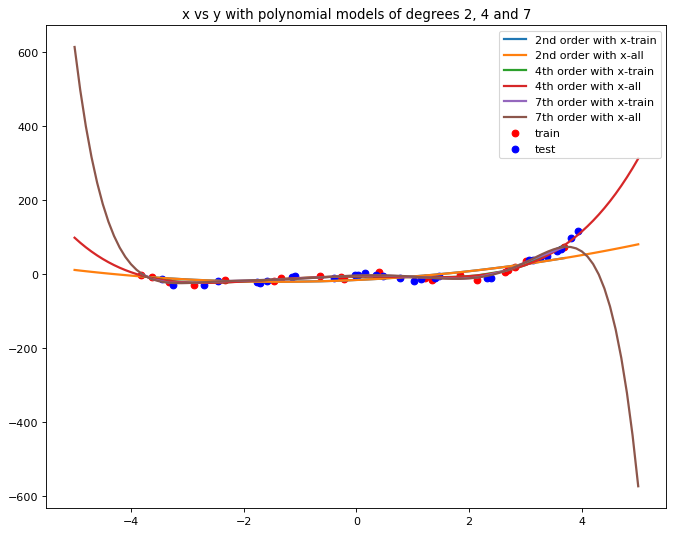

Train MSE in the order for 2nd, 4th, 7th orders:
[161.171, 35.115, 22.544]
Test MSE in the order for 2nd, 4th, 7th orders:
[402.323, 38.341, 135.208]
40% data


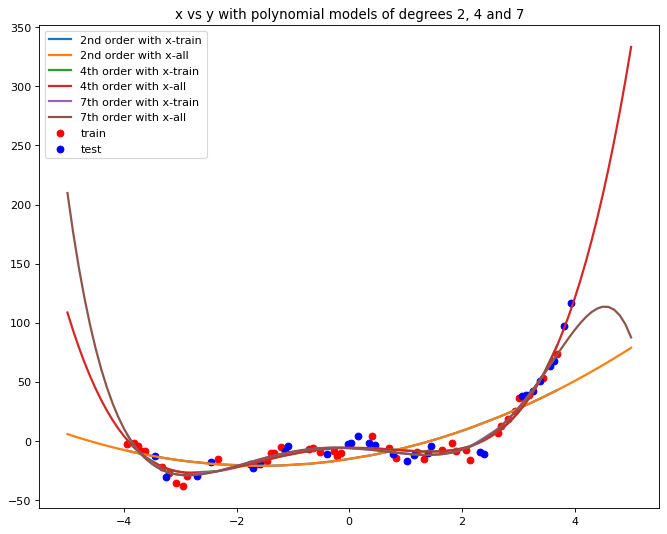

Train MSE in the order for 2nd, 4th, 7th orders:
[150.333, 31.625, 25.493]
Test MSE in the order for 2nd, 4th, 7th orders:
[405.805, 33.164, 61.237]
60% data


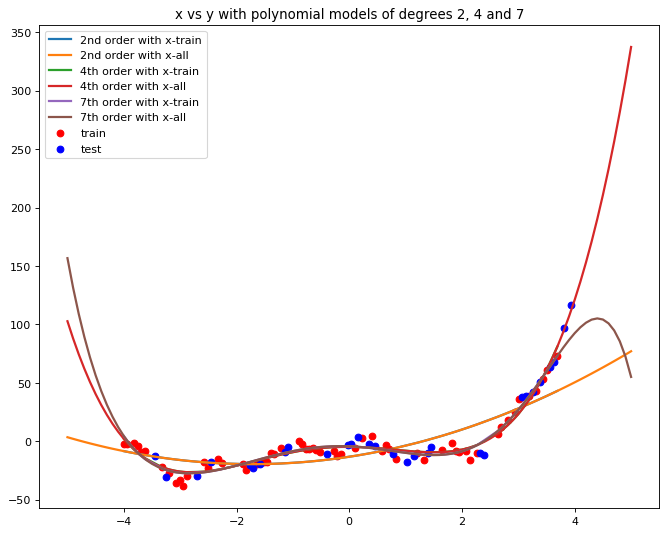

Train MSE in the order for 2nd, 4th, 7th orders:
[150.084, 29.193, 26.099]
Test MSE in the order for 2nd, 4th, 7th orders:
[403.251, 31.781, 60.167]
80% data


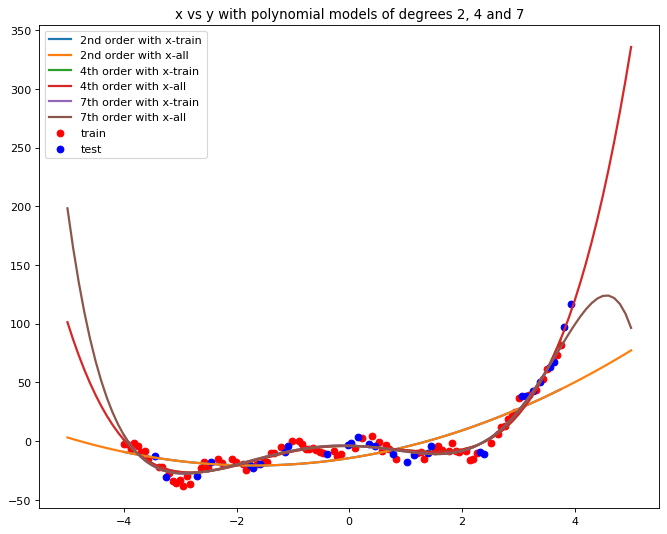

Train MSE in the order for 2nd, 4th, 7th orders:
[168.119, 29.305, 26.549]
Test MSE in the order for 2nd, 4th, 7th orders:
[407.594, 32.518, 48.077]
100% data


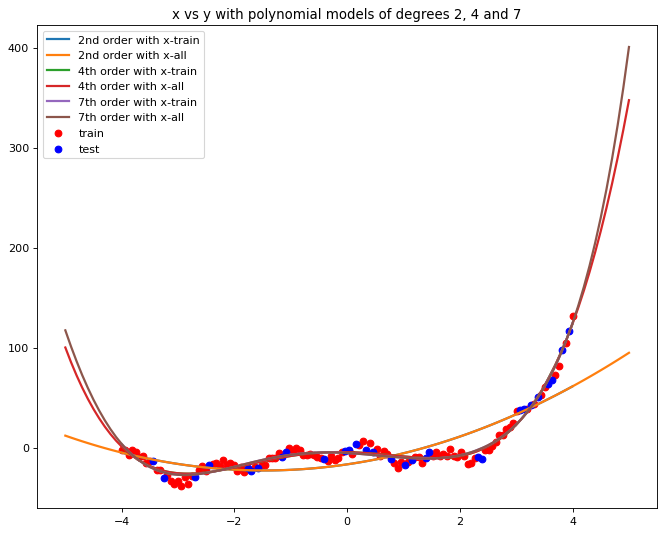

Train MSE in the order for 2nd, 4th, 7th orders:
[247.297, 31.72, 30.677]
Test MSE in the order for 2nd, 4th, 7th orders:
[320.064, 31.292, 33.411]


In [4]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## Answer:

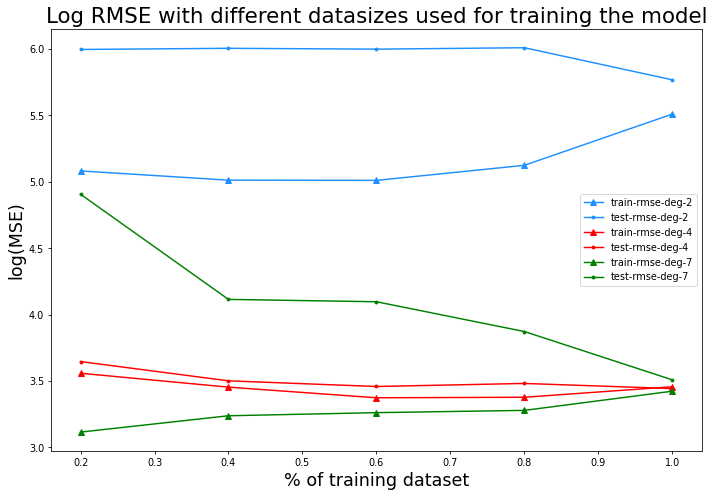

In [5]:
#Part (c)

import pandas as pd
# creating df for plotting
rmse = pd.DataFrame(data=None, columns=['degree', 'percentage of data', 'train_rmse', 'test_rmse'])
data_size = np.array([0.2, 0.4, 0.6, 0.8, 1.0])
degree = [2, 4, 7]
color = ['dodgerblue','red', 'green']
    
train_rmses = np.log(np.array([train_rmses_20, train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100]))
test_rmses = np.log(np.array([test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100]))

plt.figure(figsize=(12, 8), dpi=70)

for i in range(3):
    d = degree[i]
    plt.plot(data_size, train_rmses[:, i], label = 'train-rmse-deg-{}'.format(d), marker='^', color=color[i])
    plt.plot(data_size, test_rmses[:, i], label = 'test-rmse-deg-{}'.format(d), marker='.', color=color[i])

# adding plot attributes
plt.xlabel('% of training dataset',fontsize=18)
plt.ylabel('log(MSE)',fontsize=18)
plt.legend(loc='best')
plt.axis('tight')
plt.title('Log RMSE with different datasizes used for training the model',fontsize=22)
plt.show()

From the above graph, we can observe that train and test MSEs are least for 4th degree and highest for 2nd degree polynomial linear regression fit. However, 7th degree polynimial model has lower training MSE than 4th degree, but higher test MSE. 

Adding more data, train mse is increasing and test mse is decresing for all models. 

As 7th order polynomial is high in variance, adding more data reduces the Test MSE more significantly with increasing data size. For 2nd order polynomial, variance is already low, therfore adding more data didn't improve Test MSE with increasing data size. For 4th order polynomial, the model has balance between bias and variance already, hence increasing the data size didn't have much impact on test and train MSEs as much as it had in 7th order polynomial.

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a. Gradient Descent: If the learning rate for gradient descent is too fast, you are going to skip the true local minimum to optimize for time. If it is too slow, the gradient descent may never converge because it is trying really hard to exactly find a local minimum.

Stochastic Gradient Descent: is easier to fit in the memory and computationally faster, hence converges faster for large datasets. However, as it is updated more frequently, the steps may get noisy and can have severe oscillations and it may converge to local minima instead of global minima. One more disadvantage of this method is that its update direction depends entirely on the current data, so its update is very unstable.This can be solved by introducing momentum.    

b. For a numerical optimization solution, it is easier to define a loss function and then minimize the parameters of the function to solution. One of the ways of doing this is the Nelder-Mead method.

The problem with using fixed step size is it cannot get closer to the true minima than the step size and if the step size is low, it takes much time to move towards the minima. Nelder-Mead method overcomes this by dynamically adjusting the step size. If the value of the new point is better than the previous values, it expands the step size to accelerate towards the minima and if the value of the new point is worse, it reduces the stepsize to converge around the minima. In the usual setting, the new step size is half the previous step size when contracting and double the step size when expanding.

Problem: This method works very well for low dimensional functions, but does not perform as well for higher dimensional functions usually functions with more than ten parameters.One of the reasons behind this is for 1 or 2-dimensions it is easier to figure out the direction to go but it gets exponentially more difficult in higher dimensional functions.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

Assuming we are doing LMS, the loss function is:
$L = (\hat{y} - y)^{2}$

$ L(w)=\frac{1}{2}\sum_i (\bar t^{(i)}-y_w(\bar x^{(i)}))^2.$
         
$y = w_{0} + w_{1}x_{1} + w_{2}x_{1}x_{2} + w_{3}e^{-x1}$

For Gradient descent, the coefficient updates are:

$w_k^{'} := w_k - Learningrate* \frac{\partial L(w)}{\partial w_k}$

1.  $w_0^{'} := w_0 + Learningrate* (\bar t - y_w(\bar x^{(i)}))$

2.  $w_1^{'} := w_1 + Learningrate* (\bar t - y_w(\bar x^{(i)}))x_1$  

3.  $w_2^{'} := w_2 + Learningrate* (\bar t - y_w(\bar x^{(i)}))x_1x_2$
        
4.  $w_3^{'} := w_3 + Learningrate* (\bar t - y_w(\bar x^{(i)}))e^{-x_1},$
            


# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

## Answer:

In [6]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef  = self.coef - (self.learning_rate*gradient)  #Updated the self coefficient        
        
               
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here
                X_i = X[i,:]
                error_i = self.linearPredict(X_i) - y[i]
                # Compute gradients
                    #please put your codes here
                gradient = np.array([2*error_i, 
                                     2*error_i*X_i[0], #x1
                                     2*error_i*X_i[0]*X_i[1], #X1,x2
                                     2*error_i*math.exp(X_i[0])]) #exponent function
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.title("MSE vs Epoch",fontsize=22)
            
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('Epoch')
            plt.ylabel('Parameter value')
            plt.title("Parameter value vs Epoch",fontsize=22)

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return X.dot(self.coef)       

In [7]:
import math
data = pd.read_csv('SGD_samples-1.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

First best MSE : 0.035464965659974396 with learning rate = 0.0001 and regularization parameter = 0


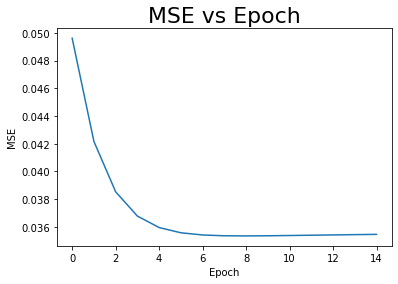

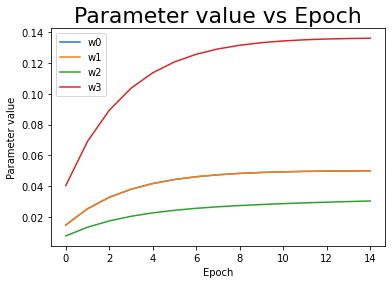

In [8]:
import itertools
import warnings
warnings.filterwarnings("ignore")
MSE_list = []
iterations = list(itertools.product(learning_rate,regularization))
for l, r in iterations:
    reg = Regression(l,r,n_epochs)
    reg.fit(X,y)
    MSE_list.append(reg.lowest_mse)
argsort_mse = np.argsort(MSE_list)

# First best combination
(l,r) = iterations[argsort_mse[0]]
print(f'First best MSE : {MSE_list[argsort_mse[0]]} with learning rate = {l} and regularization parameter = {r}')
reg = Regression(l,r,n_epochs)
reg.fit(X,y,plot=True)


Second best MSE : 0.035464965659974396 with learning rate = 0.0001 and regularization parameter = 10


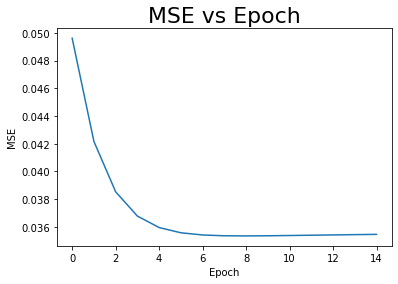

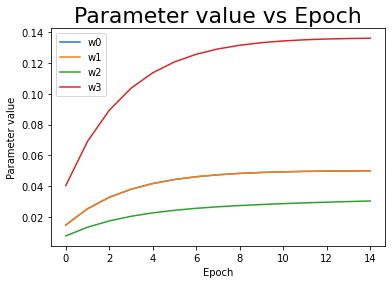

In [9]:
# Second best combination
(l,r) = iterations[argsort_mse[1]]
print(f'Second best MSE : {MSE_list[argsort_mse[1]]} with learning rate = {l} and regularization parameter = {r}')
reg = Regression(l,r,n_epochs)
reg.fit(X,y,plot=True)